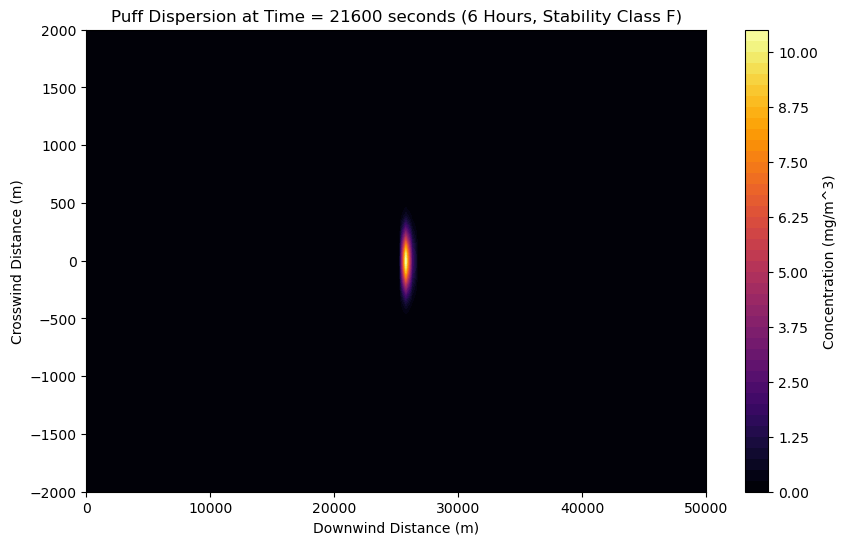

In [59]:
import numpy as np
import matplotlib.pyplot as plt



# Release parameters
Q = 100*455  # Amount of pollutant released (g)
u = 5   # Wind speed (m/s)

# Time at which we want to see the puff
t = 21600  # Time in seconds (6 hours = 21600 seconds)

# Coordinates for grid
x = np.linspace(0, 50000, 100)  # downwind distance (m), extended to 50,000 meters
y = np.linspace(-2000, 2000, 100)  # crosswind distance (m), extended to ±5000 meters
z = np.linspace(0, 1000, 50)  # vertical distance (m), for the height

X, Y, Z = np.meshgrid(x, y, z)

# Dispersion parameters (sigma_y and sigma_z) for stability class F
def dispersion_params(x_from_source):
    sigma_y = 0.02 * x_from_source**0.89 # Lateral dispersion
    sigma_z = 0.05 * x_from_source**0.61  # Vertical dispersion
    
    # Avoid division by zero by setting a minimum value for sigma_y and sigma_z
    sigma_y[sigma_y == 0] = 0.01
    sigma_z[sigma_z == 0] = 0.01
    
    return sigma_y, sigma_z

# Gaussian puff equation (3D: x = downwind, y = crosswind, z = vertical)
def puff_concentration(Q, X, Y, Z, sigma_y, sigma_z):
    term_1 = 1000.0 * (Q / (2**0.5 * np.pi**1.5 * sigma_y**2 * sigma_z)) * np.exp(-0.5 * ((X-u*t)**2 / sigma_y**2))
    term_2 = np.exp(-0.5 * (Y**2 / sigma_y**2))
    term_3 = 2.0*np.exp(-0.5 * (Z**2 / sigma_z**2))
    
    

    return  term_1 * term_2 * term_3

# Calculate puff center based on time and wind speed
x_center = u * t  # Puff moves downwind with time (at 6 hours, x_center = 43200 meters)

# Calculate sigma values based on distance from the source (not the puff center)
sigma_y, sigma_z = dispersion_params(np.abs(X))

# Calculate the concentration, based on distance from the moving puff center
concentration_mg_m3 = puff_concentration(Q, X, Y, Z, sigma_y, sigma_z)



# Plot the concentration slice at a specific height (e.g., Z = 0 for ground level)
plt.figure(figsize=(10, 6))
plt.contourf(X[:, :, 0], Y[:, :, 0], concentration_mg_m3[:, :, 0], levels=50, cmap='inferno')
plt.colorbar(label='Concentration (mg/m^3)')
plt.title(f'Puff Dispersion at Time = {t} seconds (6 Hours, Stability Class F)')
plt.xlabel('Downwind Distance (m)')
plt.ylabel('Crosswind Distance (m)')
plt.xlim(0, 50000)  # Extended to 50,000 meters
plt.ylim(-2000, 2000)  # Crosswind limits
plt.show()


In [ ]:
# we are looking down on the puff
# the puff is circular but is distorted by the axes
# the windspeed dictates when the puff arrives but doe not change the puff characteristics
